In [33]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv('data/btc.csv', sep=';', dtype={'<OPEN>': float, '<HIGH>': float, '<LOW>': float, '<CLOSE>': float, '<VOL>': float})
df['<TICKER>'] = 'BTCUSD'
df['<DATE>'] = pd.to_datetime(df['<DATE>'], format='%Y%m%d', )
df.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,BTCUSD,D,2013-10-06,0,122.00000,122.00000,122.00,122.00,0.0
1,BTCUSD,D,2013-10-07,0,123.61000,123.61000,123.61,123.61,0.0
2,BTCUSD,D,2013-10-08,0,123.91000,124.19000,123.90,124.18,4.0
3,BTCUSD,D,2013-10-09,0,124.01687,124.01687,123.84,123.84,3.0
4,BTCUSD,D,2013-10-10,0,125.85000,125.86000,125.85,125.86,2.0


In [96]:
n = 50

df['MA'] = df['<CLOSE>'].rolling(window=n).mean()
df['STDMA'] = df['MA'].rolling(window=n).std()
df

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>,MA,STDMA
0,BTCUSD,D,2013-10-06,0,122.00000,122.00000,122.00,122.00,0.0,NaN,NaN
1,BTCUSD,D,2013-10-07,0,123.61000,123.61000,123.61,123.61,0.0,NaN,NaN
2,BTCUSD,D,2013-10-08,0,123.91000,124.19000,123.90,124.18,4.0,NaN,NaN
3,BTCUSD,D,2013-10-09,0,124.01687,124.01687,123.84,123.84,3.0,NaN,NaN
4,BTCUSD,D,2013-10-10,0,125.85000,125.86000,125.85,125.86,2.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3603,BTCUSD,D,2023-08-30,0,27731.70000,27757.30000,27005.20,27305.40,2028.0,28676.832,492.098691
3604,BTCUSD,D,2023-08-31,0,27305.40000,27605.50000,25663.00,25936.20,2370.0,28587.650,482.547490
3605,BTCUSD,D,2023-09-01,0,25936.30000,26127.00000,25333.30,25808.30,2543.0,28474.096,480.494159
3606,BTCUSD,D,2023-09-02,0,25808.30000,25973.80000,25754.10,25869.70,614.0,28384.896,484.375559


In [128]:
def plot_interval(df, start, end, measure, dev):
    tmp = df[
        (df['<DATE>'] > start)
        & (df['<DATE>'] < end)
    ]

    plt.plot(tmp['<CLOSE>'])
    plt.plot(tmp[measure], c='y')
    plt.plot(tmp[measure] + 2*tmp[dev], c='r')
    plt.plot(tmp[measure] - 2*tmp[dev], c='g')
    plt.legend(['PRICE', measure, 'SELL', 'BUY'])
    plt.title(f"{start} -> {end}")

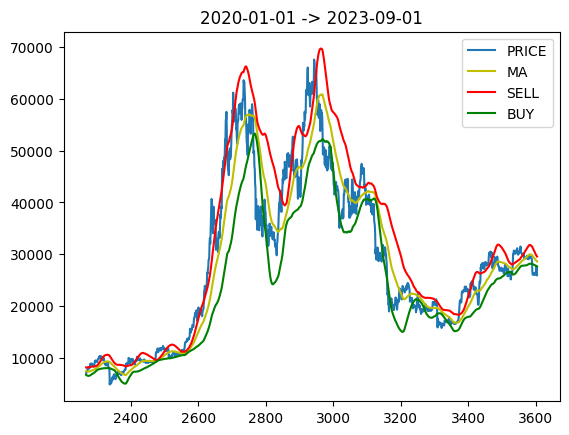

In [114]:
plot_interval(df, '2020-01-01', '2023-09-01', 'MA', 'STDMA')

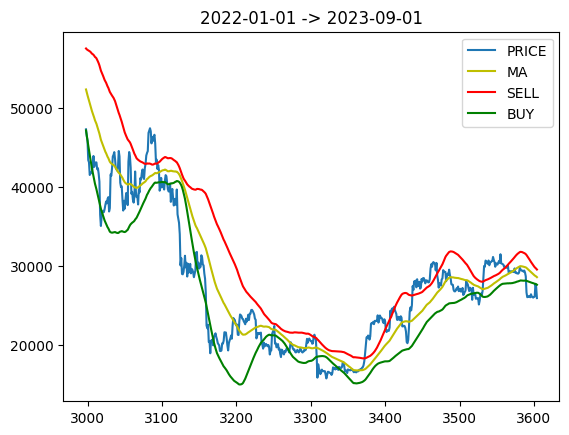

In [100]:
plot_interval(df, '2022-01-01', '2023-09-01')

In [121]:
def calc_ema(df, date, price, n):
    df['EMA'] = 1
    df.loc[0, 'EMA'] = df.loc[0, price]

    for i, day in enumerate(df[date]):
        if i == 0:
            continue
        else:
            last_price = df.loc[i, price]
            prev_ema = df.loc[i - 1, 'EMA']
            alpha = 2/(n + 1)
            df.loc[i, 'EMA'] = (last_price - prev_ema) * alpha + prev_ema

    return df['EMA']

In [131]:
n = 100
df['EMA'] = calc_ema(df, '<DATE>', '<CLOSE>', n)
df['STDEMA'] = df['EMA'].rolling(n).std()
df.head()

/var/folders/8b/tjd_lchd7bv4vf5s4r_9rvj40000gn/T/ipykernel_97870/589867623.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '122.03188118811882' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[i, 'EMA'] = (last_price - prev_ema) * alpha + prev_ema


,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>,MA,STDMA,EMA,STDEMA
0,BTCUSD,D,2013-10-06,0,122.00000,122.00000,122.00,122.00,0.0,NaN,NaN,122.000000,NaN
1,BTCUSD,D,2013-10-07,0,123.61000,123.61000,123.61,123.61,0.0,NaN,NaN,122.031881,NaN
2,BTCUSD,D,2013-10-08,0,123.91000,124.19000,123.90,124.18,4.0,NaN,NaN,122.074418,NaN
3,BTCUSD,D,2013-10-09,0,124.01687,124.01687,123.84,123.84,3.0,NaN,NaN,122.109380,NaN
4,BTCUSD,D,2013-10-10,0,125.85000,125.86000,125.85,125.86,2.0,NaN,NaN,122.183650,NaN


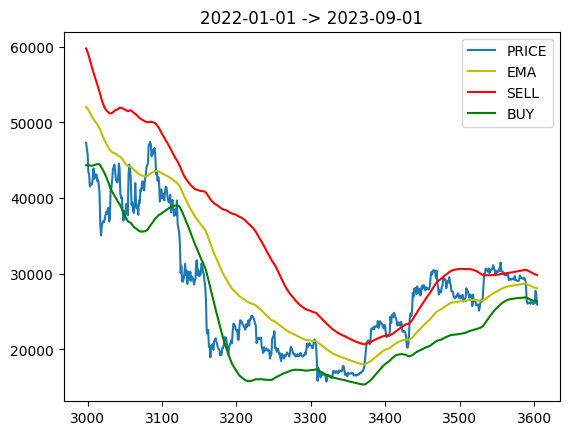

In [133]:
plot_interval(df, '2022-01-01', '2023-09-01', 'EMA', 'STDEMA')

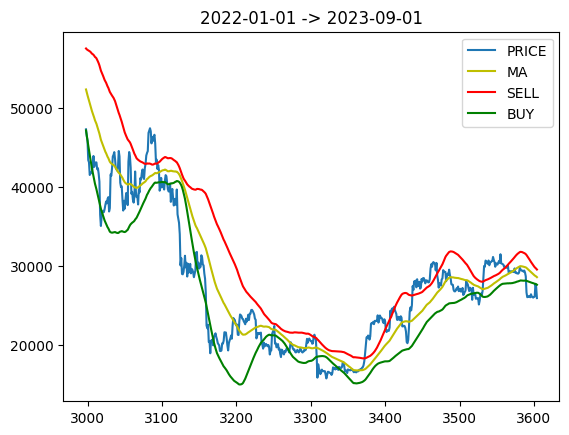

In [132]:
plot_interval(df, '2022-01-01', '2023-09-01', 'MA', 'STDMA')